<a href="https://colab.research.google.com/github/LikhithCharugundla/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

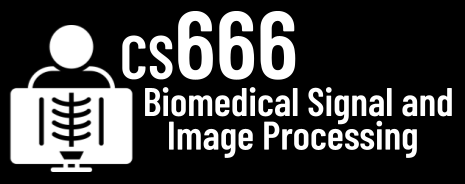

# Assignment 1

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [27]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [28]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [29]:
SAMPLING_RATE = 1000 ### TODO!
N = len(signal)   #it takes the length of the signal
SECONDS = N/SAMPLING_RATE ### TODO!

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [30]:
from biosppy import signals
output = signals.ecg.ecg(signal = signal, sampling_rate = SAMPLING_RATE, show = False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

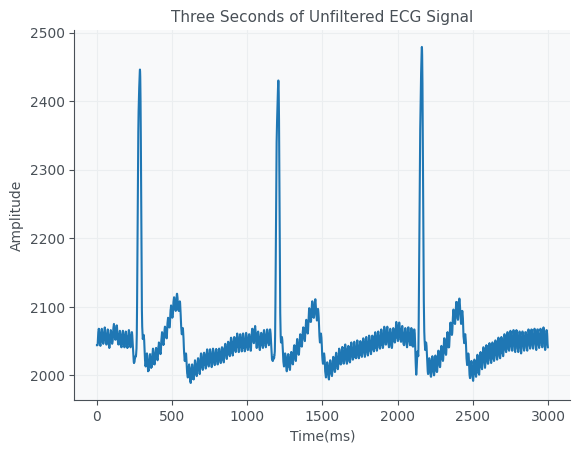

In [31]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt
limit = 3 * SAMPLING_RATE  # 3 seconds of data

plt.plot(signal[:limit])
plt.title('Three Seconds of Unfiltered ECG Signal')
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.show()

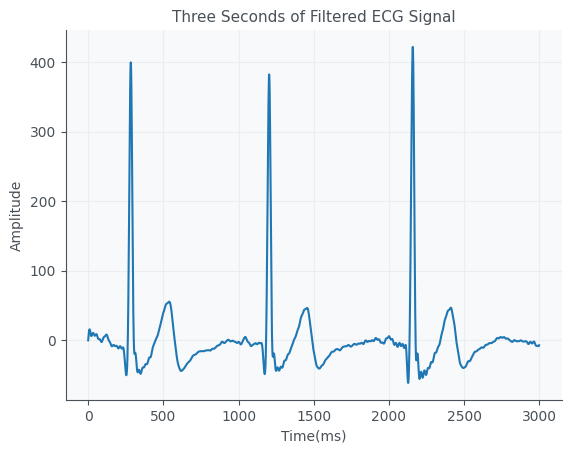

In [32]:
### TODO plot filtered signal
filteredsignal = output['filtered']
plt.plot(filteredsignal[:limit])
plt.title('Three Seconds of Filtered ECG Signal')
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

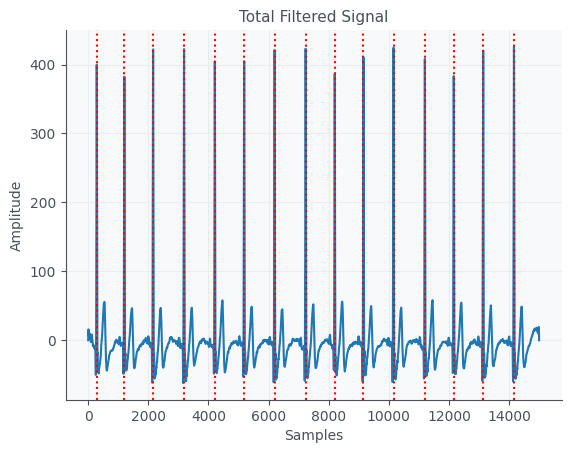

In [33]:
### TODO
filtered_signal1 = output[1]
rpeaks = output[2]
plt.plot(filtered_signal1)
plt.title('Total Filtered Signal')
for r in rpeaks:
    plt.axvline(x= r,color='r', ls=':')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [34]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

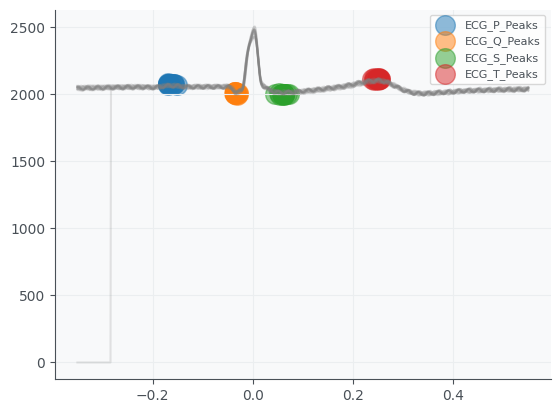

In [35]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_ ,peaks = nk.ecg_delineate(signal, rpeaks, SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [36]:
# TODO Does the detection work well?
#Yes

In [37]:
!pip install sleepecg

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

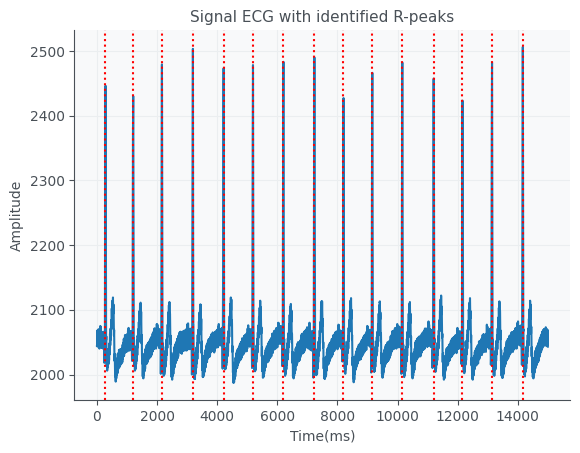

In [38]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
from sleepecg import detect_heartbeats
rpeaks1 = detect_heartbeats(signal, SAMPLING_RATE)
plt.plot(signal, label='ECG Signal')
for r in rpeaks1:
    plt.axvline(x=r, color='r', ls=':')
plt.title('Signal ECG with identified R-peaks')
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.show()

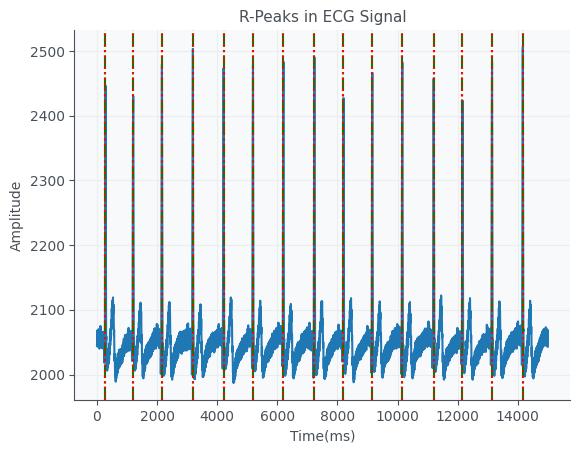

Mean squared error: 0.2


In [44]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
plt.plot(signal)
for r in rpeaks:
    plt.axvline(x=r, color='g', ls='-.')
for r in rpeaks1:
    plt.axvline(x=r, color='r', ls=':')
plt.title('R-Peaks in ECG Signal')
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.show()

from sklearn.metrics import mean_squared_error
meansquarederror = mean_squared_error(rpeaks, rpeaks1)
print("Mean squared error:", meansquarederror )

since mean squared error is 0.2 a difference can be identified

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#